# Insurance Dataset

#### Importing Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('A2_DataSets/insurance.csv', delimiter=';')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,shoesize,charges
0,19,female,27.900,0,yes,southwest,36,16884.92400
1,18,male,33.770,1,no,southeast,43,1725.55230
2,28,male,33.000,3,no,southeast,43,4449.46200
3,33,male,22.705,0,no,northwest,41,21984.47061
4,32,male,28.880,0,no,northwest,42,3866.85520


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   shoesize  1338 non-null   int64  
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [7]:
data.describe()

,age,bmi,children,shoesize,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,39.493274,13270.422265
std,14.049960,6.098187,1.205493,3.295295,12110.011237
min,18.000000,15.960000,0.000000,35.000000,1121.873900
25%,27.000000,26.296250,0.000000,37.000000,4740.287150
50%,39.000000,30.400000,1.000000,40.000000,9382.033000
75%,51.000000,34.693750,2.000000,42.000000,16639.912515
max,64.000000,53.130000,5.000000,45.000000,63770.428010


In [8]:
print ("Rows     : " , data.shape[0])
print ("Columns  : " , data.shape[1])
print ("\nFeatures : \n" , data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  1338
Columns  :  8

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'shoesize', 'charges']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
shoesize      10
charges     1337
dtype: int64


In [9]:
data.corr()

,age,bmi,children,shoesize,charges
age,1.000000,0.109272,0.042469,-0.010721,0.299008
bmi,0.109272,1.000000,0.012759,0.037997,0.198341
children,0.042469,0.012759,1.000000,0.011928,0.067998
shoesize,-0.010721,0.037997,0.011928,1.000000,0.039983
charges,0.299008,0.198341,0.067998,0.039983,1.000000


In [10]:
def plot_corr(data, size=8):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

No handles with labels found to put in legend.


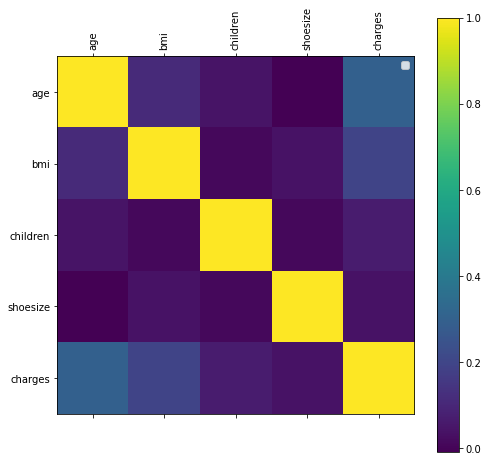

In [11]:
plot_corr(data)

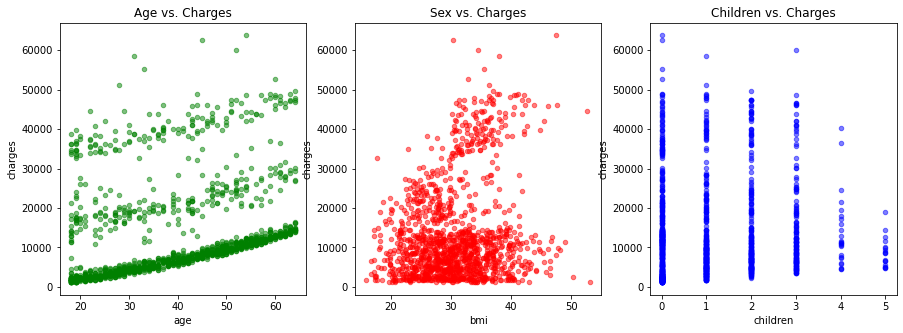

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
data.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
data.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title="Sex vs. Charges")
data.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

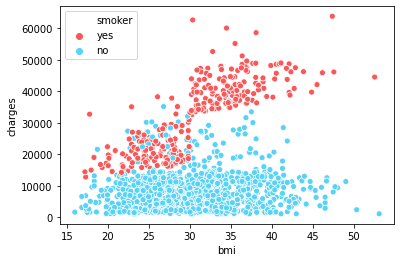

In [13]:
import seaborn as sns  # Importing Seaborn library
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="bmi", y="charges", data=data, palette=pal, hue='smoker')

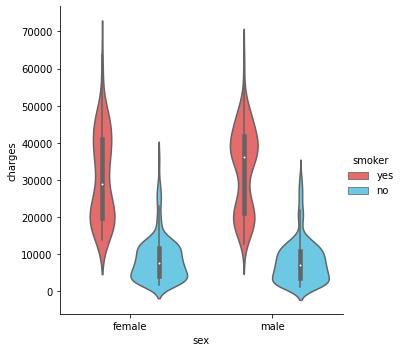

In [14]:
pal = ["#FA5858", "#58D3F7"]
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = pal)

Text(0.5, 1.0, 'Smokers')

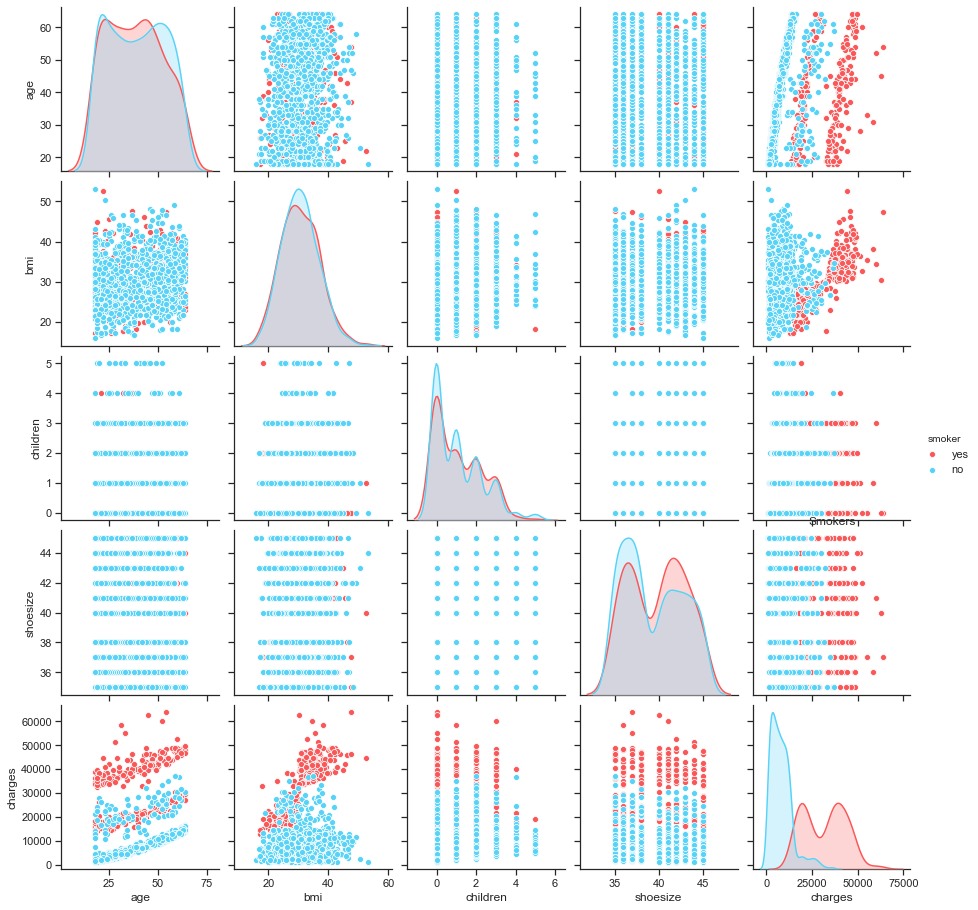

In [15]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(data, hue="smoker", palette=pal)
plt.title("Smokers")

# Data Preprocessing

#### Checking Missing Values

In [16]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
shoesize    0
charges     0
dtype: int64

There are no any missing values in the datasets.

#### Categorical Features

In [17]:
print(data['sex'].unique())
print(data['smoker'].unique())
print(data['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [18]:
#One-hot encoding by having only one one per set of categorical values per observation.
df_sex = pd.get_dummies(data['sex'],drop_first=True)
df_smoker = pd.get_dummies(data['smoker'],drop_first=True)
df_region = pd.get_dummies(data['region'],drop_first=True)

data = pd.concat([data,df_sex,df_smoker,df_region],axis=1)

data = data.drop(['sex','smoker','region'],axis=1)

data.head()

,age,bmi,children,shoesize,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,36,16884.92400,0,1,0,0,1
1,18,33.770,1,43,1725.55230,1,0,0,1,0
2,28,33.000,3,43,4449.46200,1,0,0,1,0
3,33,22.705,0,41,21984.47061,1,0,1,0,0
4,32,28.880,0,42,3866.85520,1,0,1,0,0


#### Spliting data into train and test sets

In [19]:
X = data.drop('charges',axis=1)
y = data['charges']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

### Scaling data using StandardScaler function . i.e. centering the variable at 0 and standardising the variance to 1

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

In [21]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

Score is the R2 score, which varies between 0 and 100%. It is closely related to the MSE but not the same.

Wikipedia defines r2 like this, ” … is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

In [22]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8
0,1.544465,0.103182,-0.915011,-0.771867,-1.025978,-0.512989,1.757082,-0.593802,-0.557606
1,0.481874,-0.490845,-0.915011,1.665813,0.974679,-0.512989,-0.569125,-0.593802,1.793381
2,1.048589,0.226660,1.560279,-0.771867,-1.025978,-0.512989,-0.569125,1.684062,-0.557606
3,1.119429,0.023923,-0.915011,1.361103,0.974679,1.949359,-0.569125,-0.593802,-0.557606
4,-1.005753,2.502650,0.735182,0.446973,0.974679,1.949359,-0.569125,1.684062,-0.557606


In [23]:
pd.DataFrame(y_train).head()

,charges
332,13429.03540
355,24603.04837
138,27322.73386
381,42303.69215
292,42112.23560


#### Linear Regression

In [24]:
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_test = lm.predict(X_test)
pred_train = lm.predict(X_train)
train =(mean_squared_error(y_train,pred_train))
test =(mean_squared_error(y_test,pred_test))
print("Train score:",train)
print("Test score:",test)
r2_score(y_test,pred_test)

Train score: 37726367.82853024
Test score: 33716076.127718806


0.7700512513104963

In [25]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})
results

,Actual,Predicted
764,9095.06825,9085.050831
887,5272.17580,7001.740987
890,29330.98315,36895.464667
1293,9301.89355,9586.828741
259,33750.29180,27089.617088
...,...,...
701,9541.69555,16282.374455
672,4399.73100,6498.807390
1163,2200.83085,2152.967287
1103,11363.28320,14518.700741


#### Ridge Regression


In [26]:
prams = {'alpha':[1e-10,1e-5,1e-3,1e-2,0,1,3,5,10,15,20,30,40,50,55,100]}

In [27]:
grid_ridge = GridSearchCV(Ridge(),prams,scoring='neg_mean_squared_error',cv=5)

In [28]:
grid_ridge.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.01, 0, 1, 3, 5, 10,
                                   15, 20, 30, 40, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [29]:
grid_ridge.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [30]:
ridge = Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
ridge.fit(X_train,y_train)
pred_ridge = ridge.predict(X_test)
mean_squared_error(y_test,pred_ridge)
r2_score(y_test,pred_ridge)


0.7699650350815758

#### Lasso Regression

In [31]:
lasso = GridSearchCV(Lasso(),prams,scoring='neg_mean_squared_error',cv=5)

In [32]:
lasso.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.01, 0, 1, 3, 5, 10,
                                   15, 20, 30, 40, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [33]:
lasso.best_params_

{'alpha': 100}

In [34]:
la = Lasso(alpha=100)

In [35]:
la.fit(X_train,y_train)
la.fit(X_train,y_train)
pred_la = la.predict(X_test)
mean_squared_error(y_test,pred_la)
r2_score(y_test,pred_la)


0.769105585910026

#### ElesticNet Regression

In [36]:
ele = ElasticNet(alpha=100,l1_ratio=0.5)
ele.fit(X_train,y_train)
ele.fit(X_train,y_train)
pred_ele = ele.predict(X_test)
mean_squared_error(y_test,pred_ele)
r2_score(y_test,pred_ele)

0.028637110203861615

### Distribution plot

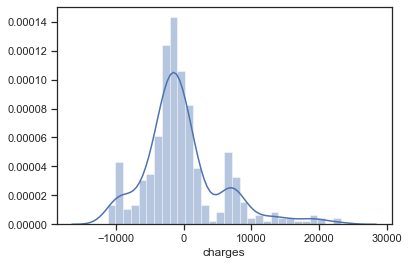

In [37]:
sns.distplot(y_test-pred_la)

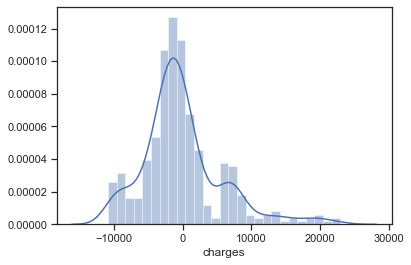

In [38]:
sns.distplot(y_test-pred_ridge)

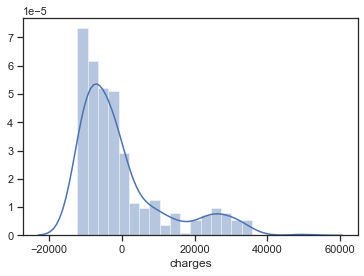

In [39]:
sns.distplot(y_test-pred_ele)

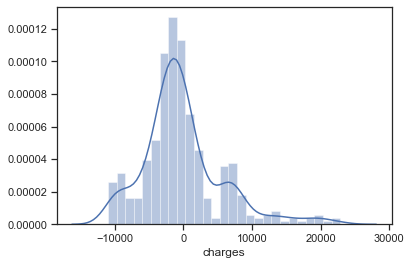

In [40]:
sns.distplot(y_test-pred_test)

## We can see that
ElesticNet Regression r2_score : 0.0286371

Lasso Regression r2_score : 0.7691055

Ridge Regression r2_score : 0.7699650

Standard Linear regression r2_score : 0.7700512

#### The best model Is the Standard Linear Regression for this particular dataSet.
It is the closest to explain the variability of the response data around its mean.